In [26]:
import matplotlib.pyplot as plt
import numpy as np
import random
import scipy.stats

def generate_data(mu=5, n=100):
    return scipy.stats.norm.rvs(loc=mu, scale=1, size=n)

def mu_estimator(data):
    return data.mean()

def theta(mu):
    return np.exp(mu)

def se_delta(mu_estimate, n):
    return np.exp(mu_estimate)/np.sqrt(n)

def confidence_interval(estimate, se):
    
    z = scipy.stats.norm.isf(0.025)
    
    return (estimate - z*se, estimate + z*se)

def parametric_bootstrap_replications(mu_estimate, n, B):
    
    return np.array([
        theta(mu_estimator(
            scipy.stats.norm.rvs(loc=mu_estimate, scale=1, size=n)
        ))
        for _ in range(B)
    ])
    
def se_parametric_bootstrap(mu_estimate, n, B):
    return parametric_bootstrap_replications(mu_estimate=mu_estimate, n=n, B=B).std()

def nonparametric_bootstrap_resample(data):
    return np.array(random.choices(population=data, k=len(data)))

def nonparametric_bootstrap_replications(data, B=100):
    
    return np.array([
        theta(mu_estimator(
            nonparametric_bootstrap_resample(data)
        ))
        for _ in range(B)
    ])
    
def se_nonparametric_bootstrap(data, B=100):
    return nonparametric_bootstrap_replications(data=data, B=B).std()

def mle_confidence_intervals(mu=5, n=100, B=int(1e3)):
    
    # Generate the data
    data = generate_data(mu=mu, n=n)
    
    # Estimate mu and theta
    mu_estimate = mu_estimator(data)
    theta_estimate = theta(mu_estimate)
    
    # Initialize the output dictionary
    confidence_intervals = {
        "delta": None,
        "parametric": None,
        "nonparametric": None
    }
    
    # Delta method
    confidence_intervals["delta"] = confidence_interval(
        theta_estimate,
        se_delta(mu_estimate=mu_estimate, n=n)
    )
    
    # Parametric bootstrap
    confidence_intervals["parametric"] = confidence_interval(
        theta_estimate,
        se_parametric_bootstrap(mu_estimate=mu_estimate, n=n, B=B)
    )
    
    # Nonparametric bootstrap
    confidence_intervals["nonparametric"] = confidence_interval(
        theta_estimate,
        se_nonparametric_bootstrap(data, B=B)
    )
    
    return confidence_intervals

In [27]:
confidence_intervals = mle_confidence_intervals(mu=5, n=100, B=int(1e3))

print(
    "------------------------------------------\n"
    "95% Confidence intervals\n"
    "------------------------------------------\n"
    "Delta method:                   "
    f"({confidence_intervals["delta"][0]:.0f}, {confidence_intervals["delta"][1]:.0f})\n"
    "Parametric bootstrap method:    "
    f"({confidence_intervals["parametric"][0]:.0f}, {confidence_intervals["parametric"][1]:.0f})\n"
    "Nonparametric bootstrap method: "
    f"({confidence_intervals["nonparametric"][0]:.0f}, {confidence_intervals["nonparametric"][1]:.0f})\n"
    "------------------------------------------\n"
)

------------------------------------------
95% Confidence intervals
------------------------------------------
Delta method:                   (122, 182)
Parametric bootstrap method:    (122, 182)
Nonparametric bootstrap method: (123, 181)
------------------------------------------



In [33]:
def plot_distributions(mu=5, n=100, B=int(1e4), trials=int(5e4), lower_x_cutoff = 80, upper_x_cutoff = 240):
    
    # Generate the data
    test_data = generate_data(mu=mu, n=n)
    
    # Perform the estimation of mu and compute n
    mu_estimate = mu_estimator(test_data)
    
    # Plot the histogram of the parametric bootstrap replications
    plt.hist(
        parametric_bootstrap_replications(mu_estimate=mu_estimate, n=n, B=B),
        label='Param. bootstrap',
        density=True, bins=20, alpha=0.5
    )
    
    # Plot the histogram of the nonparametric bootstrap replications
    plt.hist(
        nonparametric_bootstrap_replications(test_data, B=B),
        label='Nonparam. bootstrap',
        density=True, bins=20, alpha=0.5
    )
    
    # Plot the asymptotic Normal distribution approximated by the delta method
    se = se_delta(mu_estimate, n)
    x = np.linspace(start=lower_x_cutoff, stop=upper_x_cutoff, num=500)
    y = scipy.stats.norm.pdf(x, loc=theta(mu_estimate), scale=se)
    plt.plot(x, y, label='Asymp. Normal dist.')
    
    # Plot a histogram estimate of the true sampling distribution of the theta estimate
    sampling_distribution = np.array([
        theta(mu_estimator(generate_data()))
        for _ in range(trials)
    ])
    plt.hist(
        sampling_distribution,
        label='Sampling dist.',
        density=True, bins=40, alpha=0.5
    )
    
    # Finalize and show the plot
    plt.legend(loc='upper right')
    plt.show()

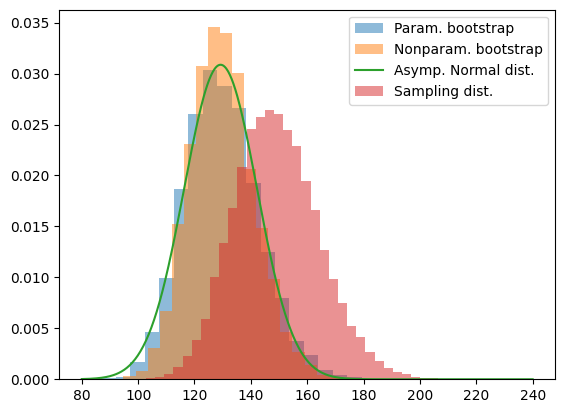

In [40]:
plot_distributions()